In [29]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(2017)

## 训练数据

In [30]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

- 数据对应的图像
- %matplotlib inline是一个魔法函数（Magic Functions），当输入plt.plot(x,y_1)后，不必再输入 plt.show()，图像将自动显示出来

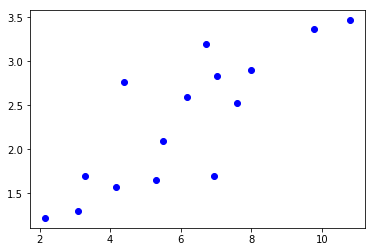

In [31]:
%matplotlib inline
plt.plot(x_train, y_train, 'bo')

- 把数据转换成`tensorflow`的`tensor`形式

In [32]:
x = tf.constant(x_train, name='x')
y = tf.constant(y_train, name='y')

# 一、线性回归

## 1-1  线性模型
- 定义模型的`w`以及`b`参数
- tf.random_normal：从正态分布中输出随机值

In [5]:
w = tf.Variable(initial_value=tf.random_normal(shape=(), seed=2017), dtype=tf.float32, name='weight')
b = tf.Variable(initial_value=0, dtype=tf.float32, name='biase')

with tf.variable_scope('Linear_Model'):
    y_pred = w * x + b

`tf.variable_scope()`用来规定一个变量的`区域`, 在这个`with`语句下定义的所有变量都在同一个`变量域`当中, `域名`就是`variable_scope()`的参数. 
所有变量域中变量的名字都以域名为前缀:

In [6]:
print(w.name)
print(y_pred.name)

weight:0
Linear_Model/add:0


使用tf.InteractiveSession()来构建会话的时候，我们可以先构建一个session然后再定义操作（operation），如果我们使用tf.Session()来构建会话，则需要在会话构建之前定义好全部的操作（operation）然后再构建会话。

In [7]:
# 开启交互式会话
sess = tf.InteractiveSession()

# 一定要有初始化这一步!!!
sess.run(tf.global_variables_initializer())

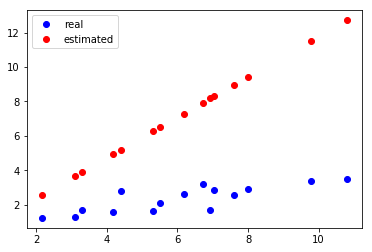

In [8]:
%matplotlib inline

# 要先将`tensor`的内容`fetch`出来
y_pred_numpy = y_pred.eval(session=sess)

plt.plot(x_train, y_train, 'bo', label='real')
plt.plot(x_train, y_pred_numpy, 'ro', label='estimated')
plt.legend()

## 优化模型

- 定义误差函数


In [9]:
loss = tf.reduce_mean(tf.square(y - y_pred))

# 看看在当前模型下的误差有多少
print(loss.eval(session=sess))

28.152378


- 现在我们用梯度下降法去优化这个模型

In [10]:
w_grad, b_grad = tf.gradients(loss, [w, b])

print('w_grad: %.4f' % w_grad.eval(session=sess))
print('b_grad: %.4f' % b_grad.eval(session=sess))

w_grad: 68.7412
b_grad: 9.6534


`步长(lr)`称为学习率

In [11]:
lr = 1e-2

w_update = w.assign_sub(lr * w_grad)
b_update = b.assign_sub(lr * b_grad)

sess.run([w_update, b_update])

[0.49174082, -0.09653385]

训练一轮之后，看输出结果

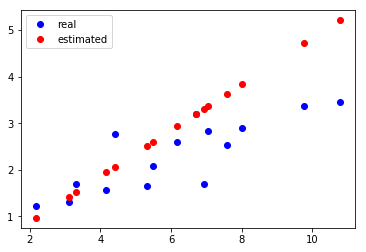

In [12]:
%matplotlib inline

y_pred_numpy = y_pred.eval(session=sess)

plt.plot(x_train, y_train, 'bo', label='real')
plt.plot(x_train, y_pred_numpy, 'ro', label='estimated')
plt.legend()

训练一次之后, 我们发现红色点跑到了蓝色点附近, 相比之前靠得更近了, 说明通过梯度下降算法，模型得到了优化

<IPython.core.display.Javascript object>


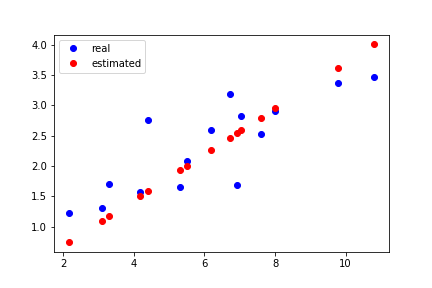

epoch: 0, loss: 0.6212941408157349
epoch: 1, loss: 0.2677771747112274
epoch: 2, loss: 0.26077061891555786
epoch: 3, loss: 0.2601791024208069
epoch: 4, loss: 0.2597087025642395
epoch: 5, loss: 0.2592429220676422
epoch: 6, loss: 0.2587795853614807
epoch: 7, loss: 0.25831854343414307
epoch: 8, loss: 0.2578599154949188
epoch: 9, loss: 0.2574036419391632


<IPython.core.display.Javascript object>


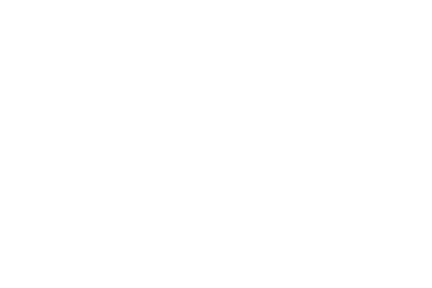

In [13]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

sess.run(tf.global_variables_initializer())

for e in range(10):
    sess.run([w_update, b_update])
    
    y_pred_numpy = y_pred.eval(session=sess)
    loss_numpy = loss.eval(session=sess)
    
    ax.clear()
    ax.plot(x_train, y_train, 'bo', label='real')
    ax.plot(x_train, y_pred_numpy, 'ro', label='estimated')
    ax.legend()
    fig.canvas.draw()
    # plt.pause(0.5)
    
    print('epoch: {}, loss: {}'.format(e, loss_numpy))

模型最后的结果

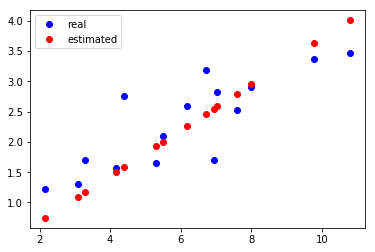

In [14]:
%matplotlib inline

plt.plot(x_train, y_train, 'bo', label='real')
plt.plot(x_train, y_pred_numpy, 'ro', label='estimated')
plt.legend()

In [15]:
sess.close()

## 1-2 多项式模型

In [16]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(2017)
# 将之前的`graph`清除

tf.reset_default_graph()

In [17]:
# 定义一个多变量函数

w_target = np.array([0.5, 3, 2.4]) # 定义参数
b_target = np.array([0.9]) # 定义参数

多项式的图像

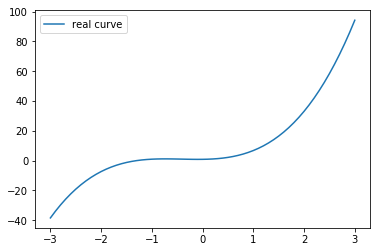

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt

# 画出这个函数的曲线
x_sample = np.arange(-3, 3.1, 0.1)
y_sample = b_target[0] + w_target[0] * x_sample + w_target[1] * x_sample ** 2 + w_target[2] * x_sample ** 3

plt.plot(x_sample, y_sample, label='real curve')
plt.legend()

In [19]:
x_train = np.stack([x_sample ** i for i in range(1, 4)], axis=1)
x_train = tf.constant(x_train, dtype=tf.float32, name='x_train')
y_train = tf.constant(y_sample, dtype=tf.float32, name='y_train')
print(x_train.shape)
print(y_train.shape)

(61, 3)
(61,)


构造线性模型，y_保存预测值

In [20]:
w = tf.Variable(initial_value=tf.random_normal(shape=(3,1)), dtype=tf.float32, name='weights')
b = tf.Variable(initial_value=0, dtype=tf.float32, name='bias')

def multi_linear(x):
    return tf.squeeze(tf.matmul(x, w) + b)
y_ = multi_linear(x_train)
print(y_.shape)

(61,)


In [21]:
sess = tf.InteractiveSession()

画出模型输出的结果和真实结果的对比

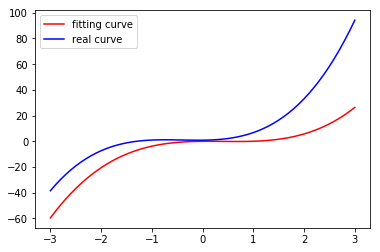

In [23]:
%matplotlib inline

sess.run(tf.global_variables_initializer())

x_train_value = x_train.eval(session=sess)
y_train_value = y_train.eval(session=sess)
y_pred_value = y_.eval(session=sess)
plt.plot(x_train_value[:,0], y_pred_value, label='fitting curve', color='r')
plt.plot(x_train_value[:,0], y_train_value, label='real curve', color='b')
plt.legend()

同样地, 定义`loss`函数

In [24]:
loss = tf.reduce_mean(tf.square(y_train - y_))
loss_numpy = sess.run(loss)
print(loss_numpy)

520.6519


In [25]:
# 利用`tf.gradients()`自动求解导数
w_grad, b_grad = tf.gradients(loss, [w, b])

print(w_grad.eval(session=sess))
print(b_grad.eval(session=sess))

[[ -30.219028]
 [-173.14769 ]
 [-199.67648 ]]
-31.84082


In [26]:
# 利用梯度下降更新参数
lr = 1e-3

w_update = w.assign_sub(lr * w_grad)
b_update = b.assign_sub(lr * b_grad)

我们来看看更新一次之后的效果

Text(0.5,1,'loss: 454.2157')

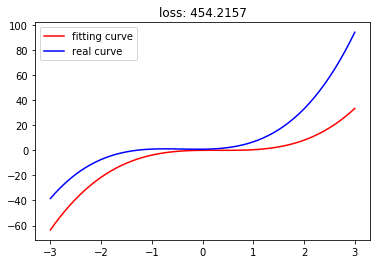

In [27]:
%matplotlib inline

sess.run([w_update, b_update])

x_train_value = x_train.eval(session=sess)
y_train_value = y_train.eval(session=sess)
y_pred_value = y_.eval(session=sess)
loss_numpy = loss.eval(session=sess)

plt.plot(x_train_value[:,0], y_pred_value, label='fitting curve', color='r')
plt.plot(x_train_value[:,0], y_train_value, label='real curve', color='b')
plt.legend()
plt.title('loss: %.4f' % loss_numpy)

可以看到, 一次更新的效果并不好, 那让我们多尝试几次

<IPython.core.display.Javascript object>


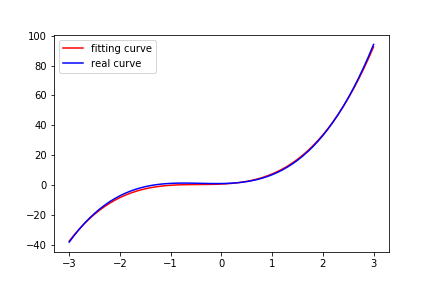

epoch: 20, loss: 35.473289489746094
epoch: 40, loss: 8.791561126708984
epoch: 60, loss: 2.5477724075317383
epoch: 80, loss: 1.0719259977340698
epoch: 100, loss: 0.7095266580581665


<IPython.core.display.Javascript object>


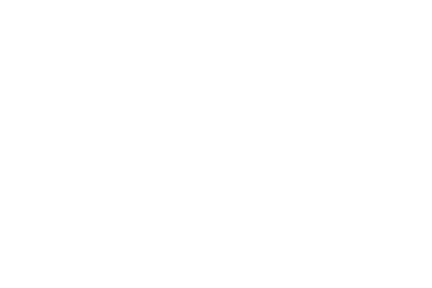

In [28]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

sess.run(tf.global_variables_initializer())

for e in range(100):  
    sess.run([w_update, b_update])
    
    x_train_value = x_train.eval(session=sess)
    y_train_value = y_train.eval(session=sess)
    y_pred_value = y_.eval(session=sess)
    loss_numpy = loss.eval(session=sess)

    ax.clear()
    ax.plot(x_train_value[:,0], y_pred_value, label='fitting curve', color='r')
    ax.plot(x_train_value[:,0], y_train_value, label='real curve', color='b')
    ax.legend()
    
    fig.canvas.draw()
    # plt.pause(0.1)
    
    if (e + 1) % 20 == 0:
        print('epoch: {}, loss: {}'.format(e + 1, loss_numpy))